In [1]:
%pip install pandas

^C
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

In [4]:
df = pd.read_csv('../data/diabetes.csv')

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
y = df['Outcome']
x = df.drop('Outcome', axis=1)

In [7]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [8]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [10]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [18]:
%pip install scikit-learn matplotlib seaborn

  Using cached contourpy-1.3.1-cp311-cp311-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.55.0-cp311-cp311-win_amd64.whl.metadata (167 kB)
  Using cached kiwisolver-1.4.7-cp311-cp311-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-11.0.0-cp311-cp311-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.8 MB ? eta -:--:--
   ------------ --------------------------- 2.4/7.8 MB 8.9 MB/s eta 0:00:01
   -------------------------------------- - 7.6/7.8 MB 17.4 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 14.7 MB/s eta 0:00:00
Using cached contourpy-1.3.1-cp311-cp311-win_amd64.whl (219 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.55.0-cp311-cp311-win_amd64.whl (2.2 MB)
Using cached kiwisol

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten

In [11]:
model = Sequential()

In [13]:
model.add(Dense(32, activation='relu', input_shape=(8,)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

c:\Users\Kevin\anaconda3\envs\student\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - accuracy: 0.5667 - loss: 0.6899 - val_accuracy: 0.6098 - val_loss: 0.6826
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7016 - loss: 0.6646 - val_accuracy: 0.6098 - val_loss: 0.6750
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6681 - loss: 0.6547 - val_accuracy: 0.6098 - val_loss: 0.6707
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6670 - loss: 0.6501 - val_accuracy: 0.6098 - val_loss: 0.6686
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6813 - loss: 0.6346 - val_accuracy: 0.6098 - val_loss: 0.6641
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6671 - loss: 0.6325 - val_accuracy: 0.6098 - val_loss: 0.6600
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6400 - loss: 0.6474 - val_accuracy: 0.6098 - val_loss: 0.6540
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6586 - loss: 0.6357 - val_accuracy: 0.60

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step  


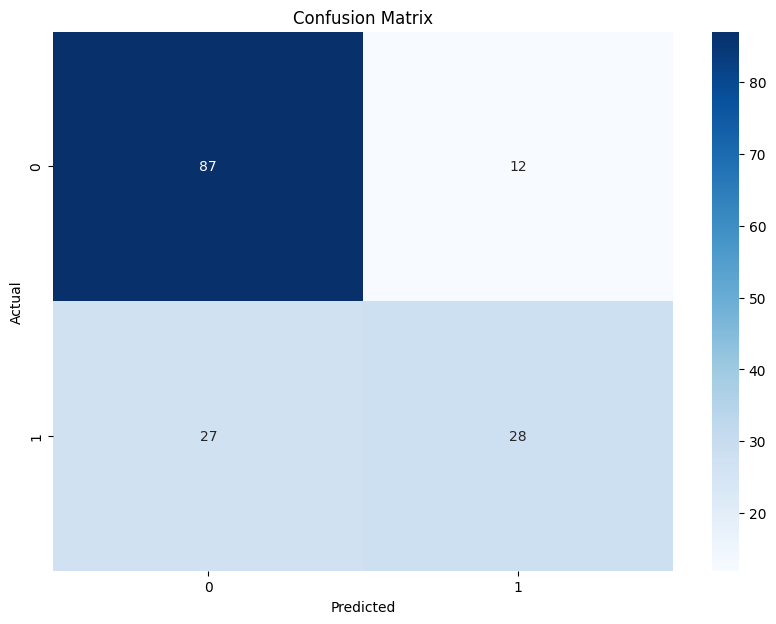

              precision    recall  f1-score   support

           0       0.76      0.88      0.82        99
           1       0.70      0.51      0.59        55

    accuracy                           0.75       154
   macro avg       0.73      0.69      0.70       154
weighted avg       0.74      0.75      0.74       154

ROC-AUC Score: 0.7390266299357208


In [22]:
from sklearn.metrics import classification_report, roc_auc_score

# Make predictions on the test dataset
y_pred = model.predict(x_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_test, y_pred_binary))

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print(f'ROC-AUC Score: {roc_auc}')

In [14]:
# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7294 - loss: 0.5926
Test Loss: 0.5960639715194702
Test Accuracy: 0.7467532753944397


In [15]:
# Make predictions on the test dataset
y_pred = model.predict(x_test)
# Convert probabilities to binary predictions (0 or 1)
y_pred_binary = (y_pred > 0.5).astype(int)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


In [14]:
model.save('diabetes_model.keras')

In [ ]:
# Example input features
example_input = {
    'Pregnancies': 0,
    'Glucose': 90,
    'BloodPressure': 70,
    'SkinThickness': 20,
    'Insulin': 80,
    'BMI': 22.0,
    'DiabetesPedigreeFunction': 0.2,
    'Age': 25
}

# Convert the example input to a DataFrame
example_df = pd.DataFrame([example_input])

# Make a prediction
y_pred_example = model.predict(example_df)
y_pred_binary_example = (y_pred_example > 0.5).astype(int)

print(f'Predicted Probability: {y_pred_example[0][0]}')
print(f'Binary Prediction: {y_pred_binary_example[0][0]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted Probability: 0.023411598056554794
Binary Prediction: 0
